In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Reading the Files

In [2]:
data_new = pd.read_csv('INNHotelsGroup_newdata.csv')
data_past = pd.read_csv('INNHotelsGroup_pastdata.csv')

In [3]:
data_past.shape

(27093, 12)

In [4]:
data_new.shape

(3583, 11)

In [5]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  3583 non-null   object 
 1   lead_time                   3583 non-null   int64  
 2   market_segment_type         3583 non-null   object 
 3   no_of_special_requests      3583 non-null   int64  
 4   avg_price_per_room          3583 non-null   float64
 5   no_of_adults                3583 non-null   int64  
 6   no_of_weekend_nights        3583 non-null   int64  
 7   arrival_date                3583 non-null   object 
 8   required_car_parking_space  3583 non-null   int64  
 9   no_of_week_nights           3583 non-null   int64  
 10  booking_status              3583 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 308.0+ KB


In [6]:
data_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27093 entries, 0 to 27092
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  27093 non-null  object 
 1   lead_time                   27093 non-null  int64  
 2   market_segment_type         27093 non-null  object 
 3   no_of_special_requests      27093 non-null  int64  
 4   avg_price_per_room          27093 non-null  float64
 5   no_of_adults                27093 non-null  int64  
 6   no_of_weekend_nights        27093 non-null  int64  
 7   arrival_date                27093 non-null  object 
 8   required_car_parking_space  27093 non-null  int64  
 9   no_of_week_nights           27093 non-null  int64  
 10  booking_status              27093 non-null  object 
 11  rebooked                    8857 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.5+ MB


### Descriptive Statistics

In [7]:
data_past.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,27093.0,81.605249,84.901428,0.0,14.0,55.0,118.0,443.0
no_of_special_requests,27093.0,0.556454,0.743715,0.0,0.0,0.0,1.0,5.0
avg_price_per_room,27093.0,101.025910,34.557289,0.0,79.0,97.0,119.0,540.0
no_of_adults,27093.0,1.825822,0.512182,0.0,2.0,2.0,2.0,4.0
no_of_weekend_nights,27093.0,0.778319,0.861787,0.0,0.0,1.0,1.0,6.0
required_car_parking_space,27093.0,0.028864,0.167426,0.0,0.0,0.0,0.0,1.0
no_of_week_nights,27093.0,2.171373,1.386023,0.0,1.0,2.0,3.0,17.0


#### Inference
* we can infer from the data that we can suspect outliers on the upper tail of lead time,avg price per room
  and no.of.week nights.

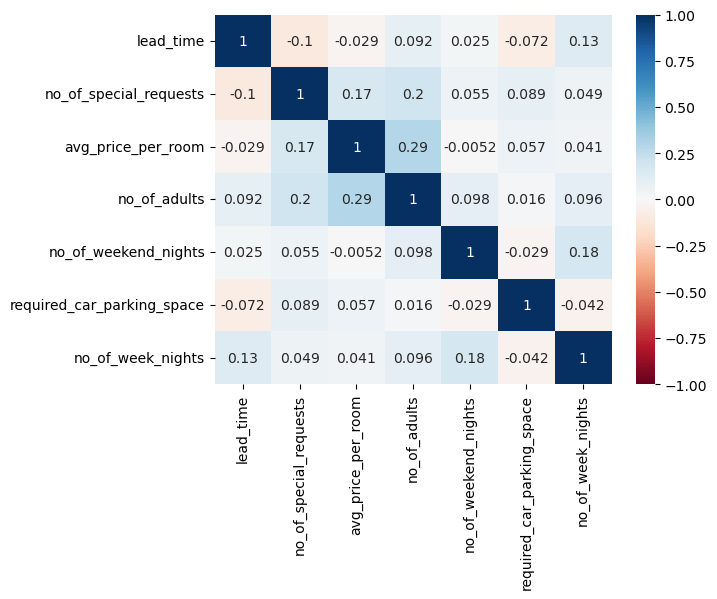

In [8]:
# let us look at the correlation plot as well
sns.heatmap(data_past.corr(numeric_only=True),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

#### Inference

* There is some positive correlation between average price per room and no.of.adults.
* Weak Positive Correlation between no.of.special request and no.of.adults.
* Weak Positive Correlation between no.of.week nights and weekend nights.
* Weak Positive Correlation between average price per room and special request.

### Data Visualization and Data Preprocessing

In [9]:
# Can you tell me what % of cancelled booking were rebooked?
rebooked = data_past[data_past['booking_status'] == 'Canceled']['rebooked']
rebooked

4         No
12        No
16        No
17        No
22        No
        ... 
27088    Yes
27089     No
27090     No
27091     No
27092     No
Name: rebooked, Length: 8857, dtype: object

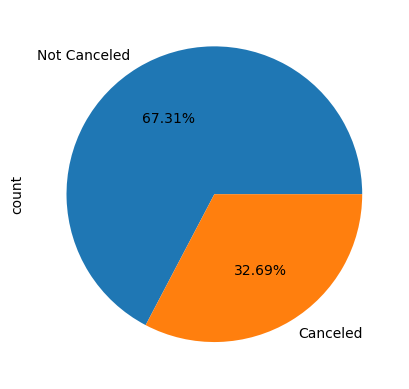

In [10]:
data_past['booking_status'].value_counts().plot(kind = 'pie',autopct='%.2f%%')
plt.show()

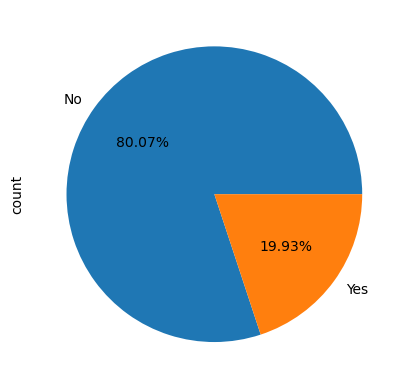

In [11]:
rebooked.value_counts().plot(kind = 'pie',autopct='%.2f%%')
plt.show()

#### Inference
* There were 33% bookings which were cancelled at the last minute.Out of that 80% of the
  cancelled bookings were not rebooked.That is the main reason which company is incurring losses.

In [12]:
# Now we do not need the rebooked column in our analysis,hence we can drop it
data_past.drop(columns=['rebooked'],inplace=True)

In [13]:
# past data has to be used as training set and new data as test set
# for now we will store y_test in separate variable for doing validation Later on.
# We also need to combine train and test data over here in order to preprocess.

In [14]:
y_test = data_new['booking_status']
data_new.drop(columns=['booking_status'],inplace = True)

In [15]:
data = pd.concat([data_past,data_new],axis=0)

In [16]:
data.shape

(30676, 11)

In [17]:
data.isnull().sum()

booking_id                       0
lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
arrival_date                     0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
dtype: int64

#### Drop the duplicates

In [18]:
data[data.duplicated()]

,booking_id,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30676 entries, 0 to 3582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  30676 non-null  object 
 1   lead_time                   30676 non-null  int64  
 2   market_segment_type         30676 non-null  object 
 3   no_of_special_requests      30676 non-null  int64  
 4   avg_price_per_room          30676 non-null  float64
 5   no_of_adults                30676 non-null  int64  
 6   no_of_weekend_nights        30676 non-null  int64  
 7   arrival_date                30676 non-null  object 
 8   required_car_parking_space  30676 non-null  int64  
 9   no_of_week_nights           30676 non-null  int64  
 10  booking_status              27093 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 2.8+ MB


In [20]:
data['arrival_date']=pd.to_datetime(data['arrival_date'],format='%Y-%m-%d')

In [21]:
data['arrival_day'] = data['arrival_date'].dt.day
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_weekday'] = data['arrival_date'].dt.weekday

In [22]:
data.drop(columns=['arrival_date','booking_id'],inplace=True)

In [23]:
data.head(3)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4


## Visualization

In [24]:
data.columns

Index(['lead_time', 'market_segment_type', 'no_of_special_requests',
       'avg_price_per_room', 'no_of_adults', 'no_of_weekend_nights',
       'required_car_parking_space', 'no_of_week_nights', 'booking_status',
       'arrival_day', 'arrival_month', 'arrival_weekday'],
      dtype='object')

In [25]:
num_cols = ['lead_time','avg_price_per_room','arrival_day']
cat_cols = data.drop(columns=num_cols).columns

In [26]:
num_cols

['lead_time', 'avg_price_per_room', 'arrival_day']

In [27]:
cat_cols

Index(['market_segment_type', 'no_of_special_requests', 'no_of_adults',
       'no_of_weekend_nights', 'required_car_parking_space',
       'no_of_week_nights', 'booking_status', 'arrival_month',
       'arrival_weekday'],
      dtype='object')

## Univariate Analysis

#### Numerical Columns

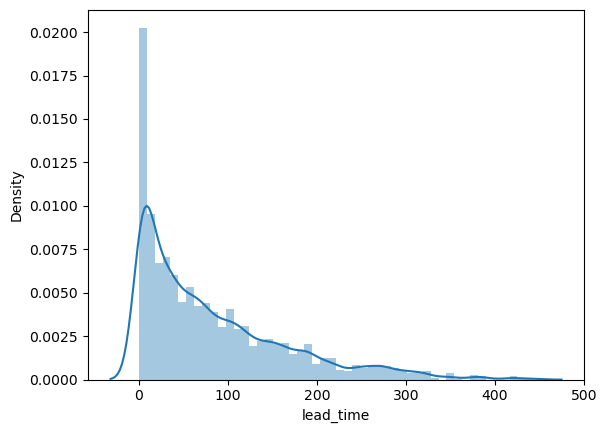

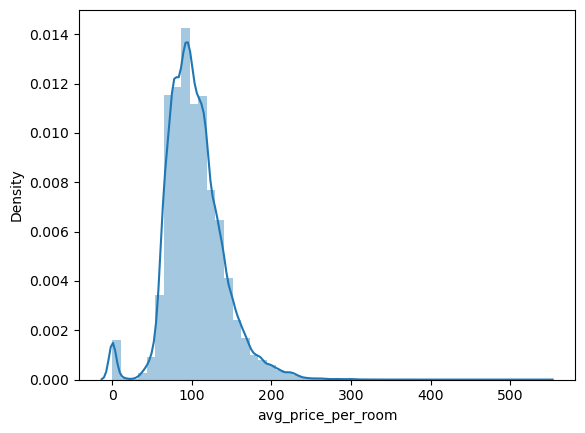

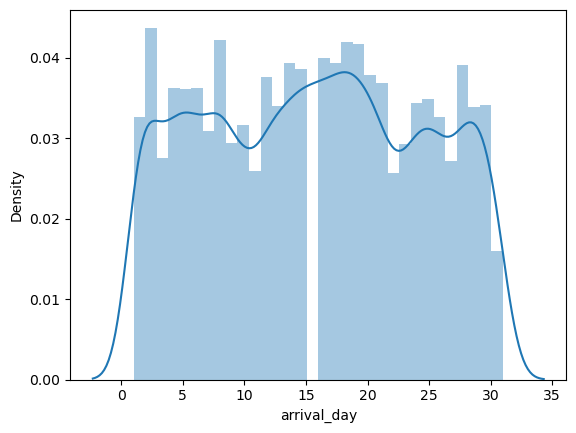

In [28]:
for i in num_cols:
    sns.distplot(data[i])
    plt.show()

## Inference
* Lead time is highly right skewed.
* Average is highly right skewed with 0 price in some entries.
* Although arrival day is almost uniform,but there is no data in 15th Day.


#### Categorical Columns

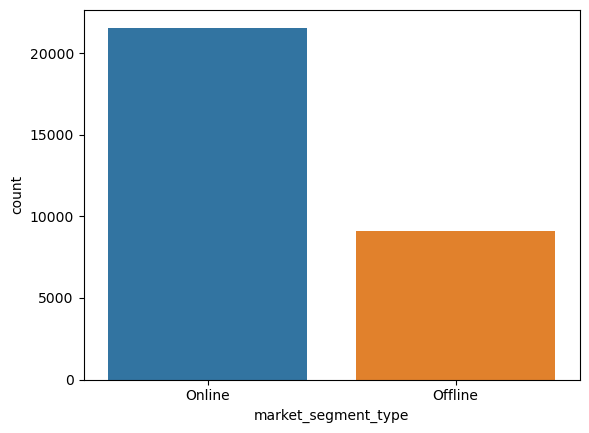

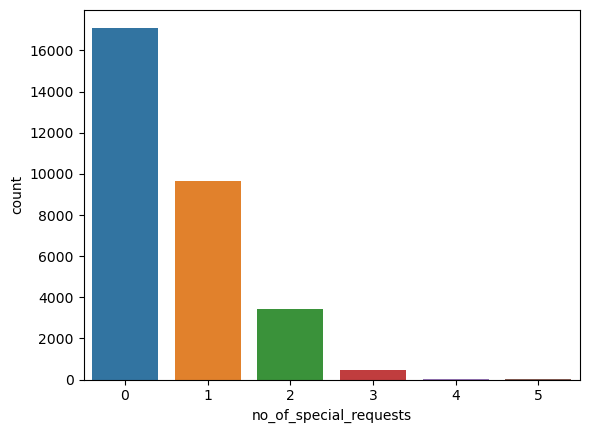

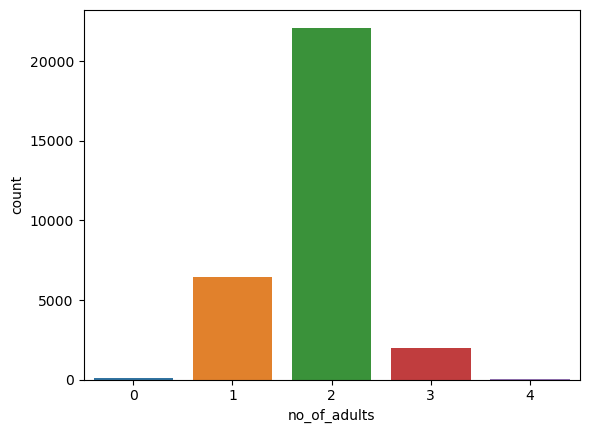

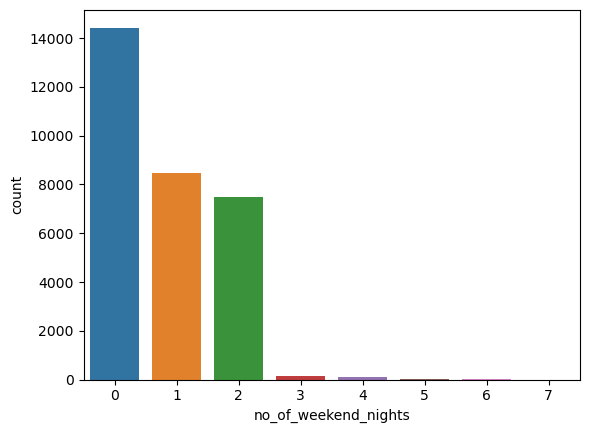

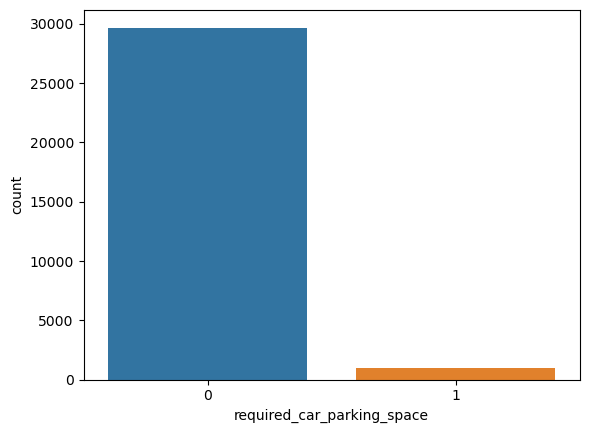

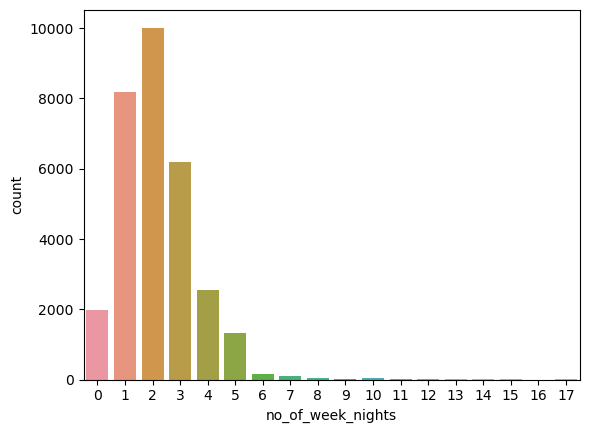

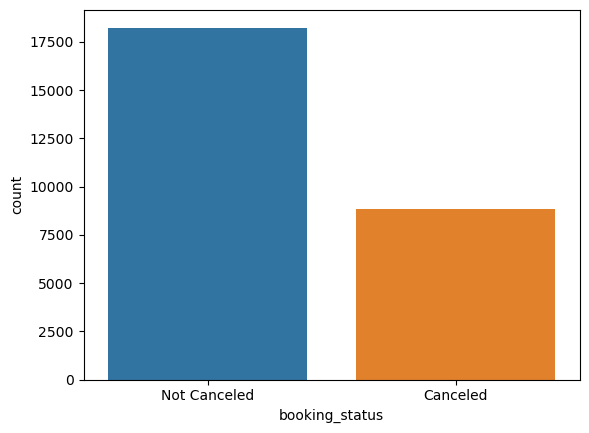

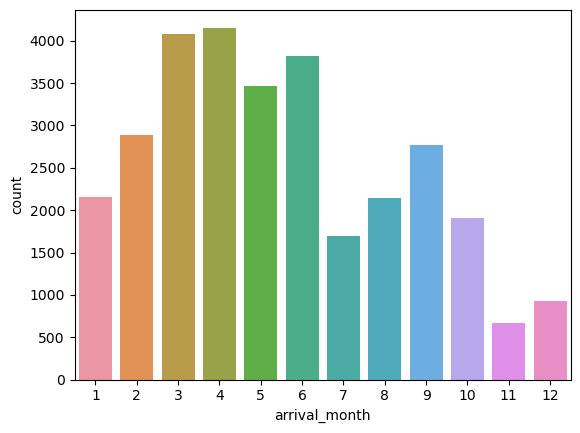

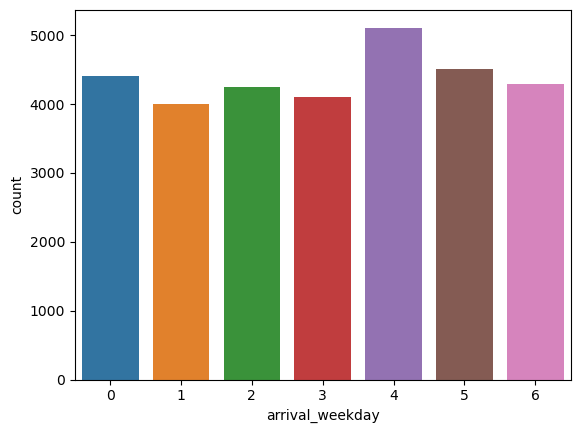

In [29]:
for i in cat_cols:
    sns.countplot(x=data[i])
    plt.show()

## Inference
* Most of the bookings are online.
* Either there are no requests or 1 requests.
* Most of the bookings have been made by couples.
* Most of the customers have 0,1 or 2 weekend nights in their stay.
* Very few customers requested for car parking space.
* Very few customers are having more than 5 week nights in their stay.
* Maximum arrivals are in month March and April and arrival day is Friday.

## Bivariate Analysis

#### Numerical Columns vs Categorical Columns

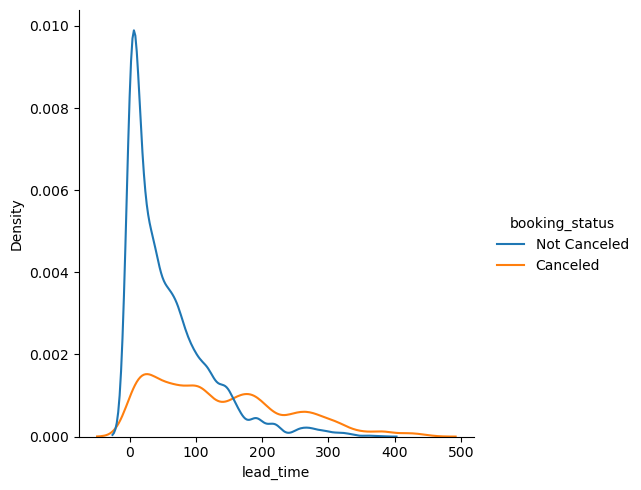

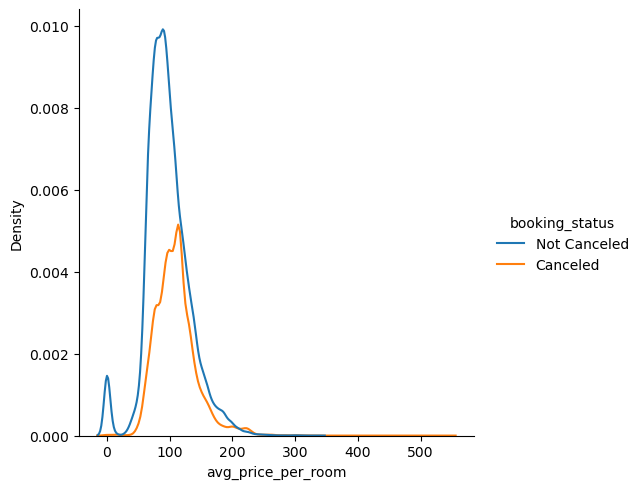

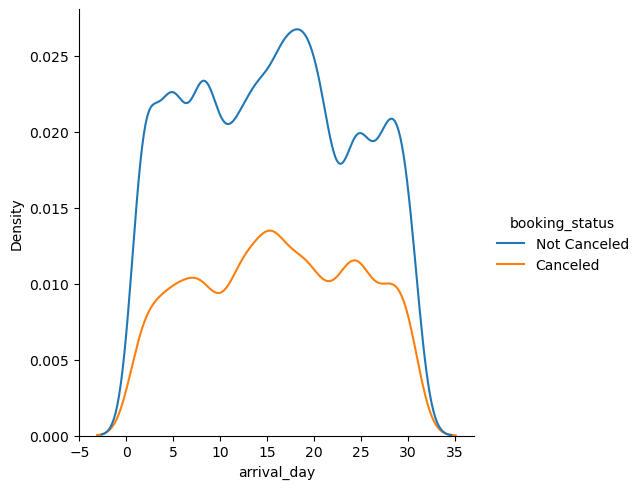

In [30]:
for i in num_cols:
    sns.displot(data=data,x=i,hue=data['booking_status'],kind='kde')
    plt.show()

## Inference
* In lead time and average price for more extreme values the booking is canceled.

#### Categorical vs Categorical columns

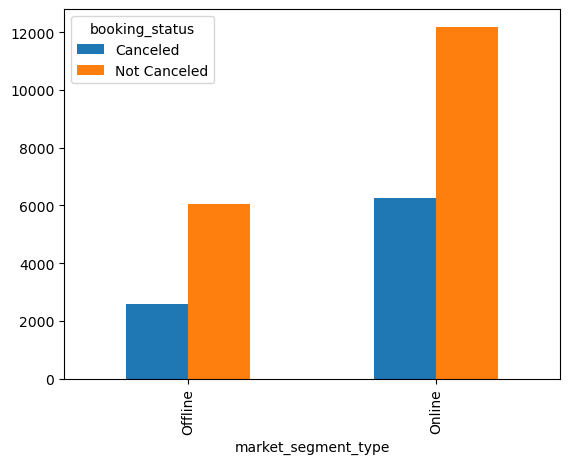

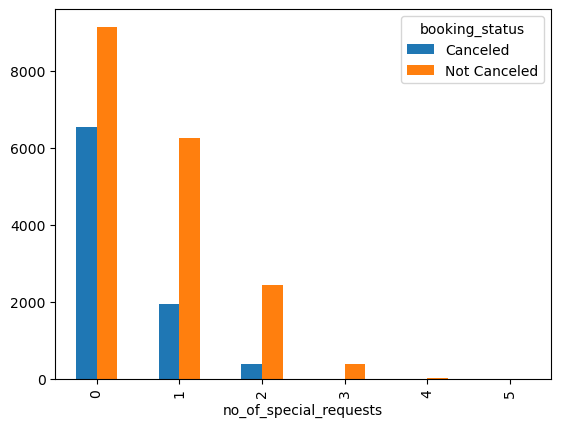

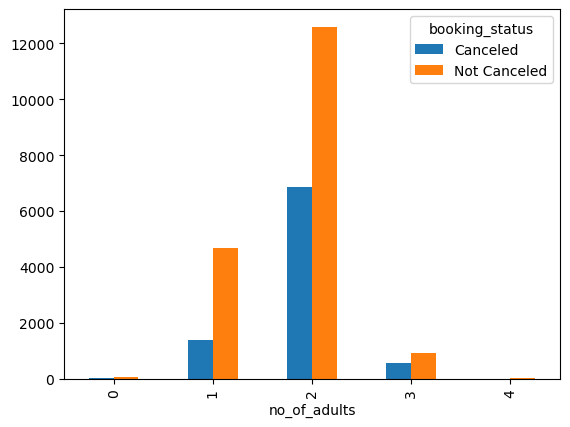

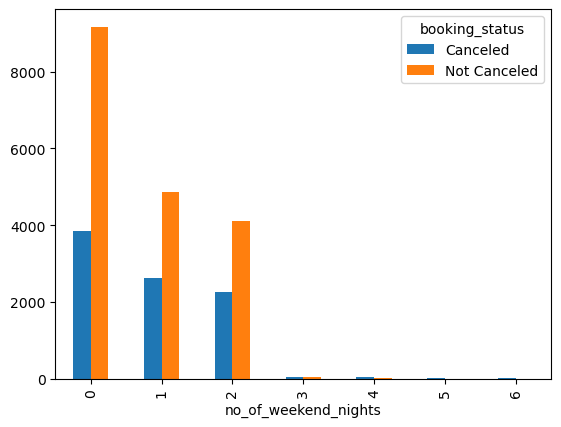

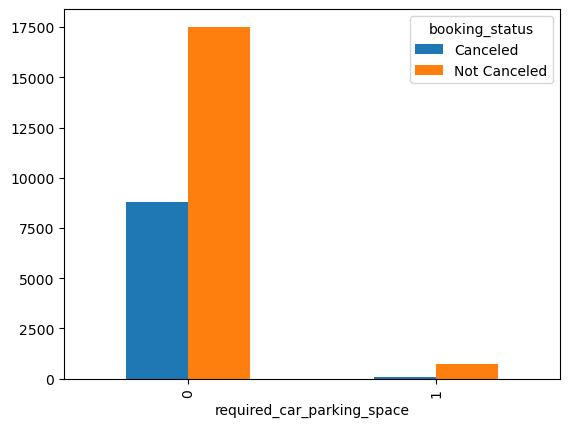

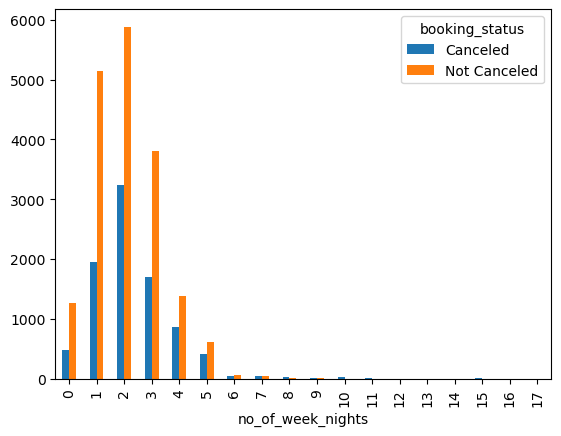

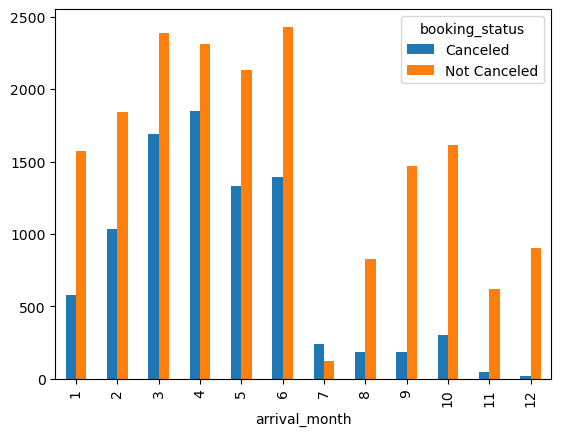

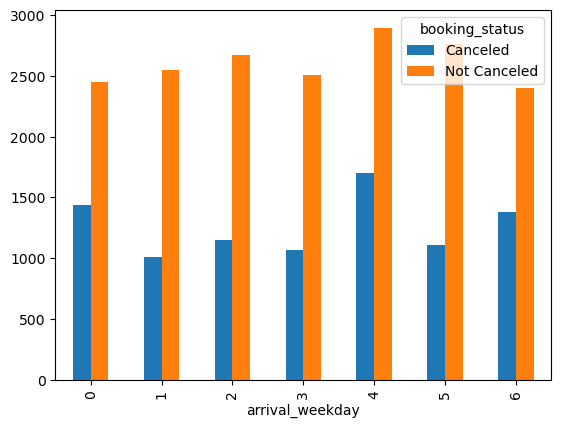

In [31]:
for i in cat_cols:
    if i != 'booking_status':
        pd.crosstab(data[i],data['booking_status']).plot(kind='bar')
        plt.show()

## Missing value Treatment

In [32]:
data.isnull().sum()

lead_time                        0
market_segment_type              0
no_of_special_requests           0
avg_price_per_room               0
no_of_adults                     0
no_of_weekend_nights             0
required_car_parking_space       0
no_of_week_nights                0
booking_status                3583
arrival_day                      0
arrival_month                    0
arrival_weekday                  0
dtype: int64

## Outlier Treatment

In [33]:
# We will treat outliers from test data only,As it might lead to data Leakage.

## Encoding

In [34]:
data.head()

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,booking_status,arrival_day,arrival_month,arrival_weekday
0,0,Online,0,85.03,1,1,0,0,Not Canceled,1,1,4
1,34,Online,2,125.10,2,2,0,0,Not Canceled,1,1,4
2,24,Online,1,71.69,2,2,0,0,Not Canceled,1,1,4
3,23,Online,0,84.70,1,2,0,0,Not Canceled,1,1,4
4,46,Online,1,149.40,2,2,0,3,Canceled,1,1,4


In [35]:
# Online = 1,Offline = 0
data['market_segment_type'] = data['market_segment_type'].map({'Online' : 1,'Offline' : 0})

In [36]:
data['market_segment_type'].value_counts()

market_segment_type
1    21561
0     9115
Name: count, dtype: int64

In [37]:
# Canceled = 1,Not Canceled = 0
data['booking_status'] = data['booking_status'].map({'Canceled' : 1,'Not Canceled' : 0})

In [38]:
data['booking_status'].value_counts()

booking_status
0.0    18236
1.0     8857
Name: count, dtype: int64

In [39]:
y_test = y_test.map({'Canceled' : 1,'Not Canceled' : 0})

In [40]:
y_test.value_counts()

booking_status
0    2383
1    1200
Name: count, dtype: int64

## Train Test Split

In [41]:
x_test = data[data['booking_status'].isnull()]

In [42]:
x_test.drop(columns=['booking_status'],inplace=True)

In [43]:
x_test.shape

(3583, 11)

In [44]:
train = data[data['booking_status'].notnull()]

In [45]:
train.shape

(27093, 12)

In [46]:
# Lets drop duplicates from train
train.drop_duplicates(inplace=True)

In [47]:
train.shape

(18655, 12)

In [48]:
# Cap the extreme outliers

for i in ['lead_time','avg_price_per_room']:
    q3,q1 = np.quantile(train[i],[0.75,0.25])
    IQR = q3-q1
    ul,ll = q3+2.5*IQR,q1-2.5*IQR
    train[i] = np.where((train[i]>ul),ul,train[i])
    train[i] = np.where((train[i]<ll),ll,train[i])

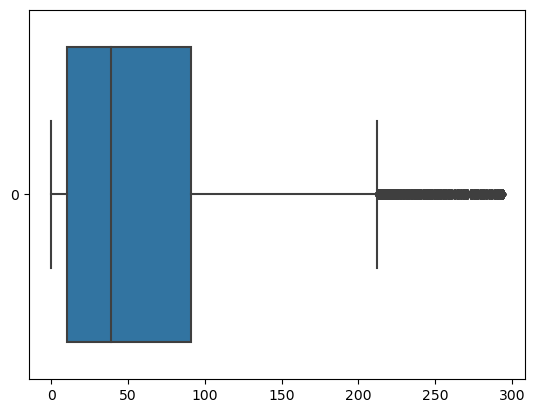

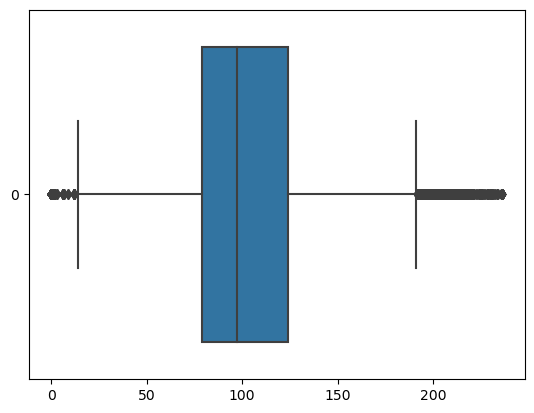

In [49]:
for i in ['lead_time','avg_price_per_room']:
    sns.boxplot(train[i],orient = 'h')
    plt.show()

In [50]:
x_train = train.drop(columns='booking_status')
y_train = train['booking_status']

In [51]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18655, 11)
(3583, 11)
(18655,)
(3583,)


## Predictive Modelling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV

In [53]:
mod = []
acc = []
pre = []
rec = []
f1 = []
ck = []

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]
    
    print('classification report\n',classification_report(ytest,hard))
    fpr,tpr,th = roc_curve(ytest,soft)
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()
    
    inp = input('Do you want to save the model in score card? Y/N : ')
    if inp.lower() == 'y':
        global scorecard
        mod.append(str(model))
        acc.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        scorecard = pd.DataFrame({'Model' : mod,
                                  'Accuracy': acc,
                                  'Precision' : pre,
                                  'Recall' : rec,
                                  'F1 Score' : f1,
                                  'Cohen Kappa' : ck})
    else:
        return

### Logistic Regression

classification report
               precision    recall  f1-score   support

           0       0.79      0.91      0.85      2383
           1       0.75      0.52      0.61      1200

    accuracy                           0.78      3583
   macro avg       0.77      0.72      0.73      3583
weighted avg       0.78      0.78      0.77      3583



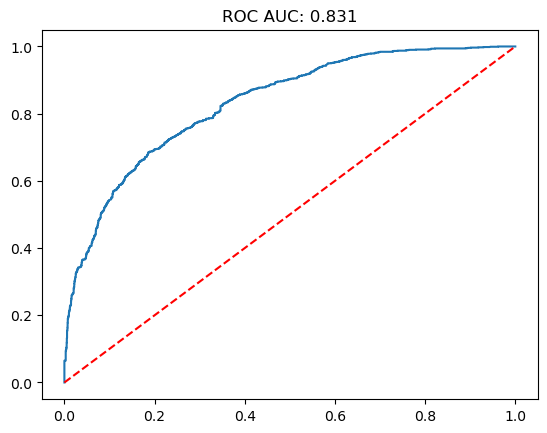

Do you want to save the model in score card? Y/N : y


In [54]:
model_validation(LogisticRegression(),x_train,y_train,x_test,y_test)

In [55]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168


### Decision Tree

In [56]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth' : [4,5,6,7,8]},
                   cv=5,scoring='f1')

In [57]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8]}, scoring='f1')

In [58]:
gscv.best_score_

0.5767998423987897

In [59]:
gscv.best_params_

{'max_depth': 7}

classification report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      2383
           1       0.71      0.69      0.70      1200

    accuracy                           0.80      3583
   macro avg       0.78      0.77      0.78      3583
weighted avg       0.80      0.80      0.80      3583



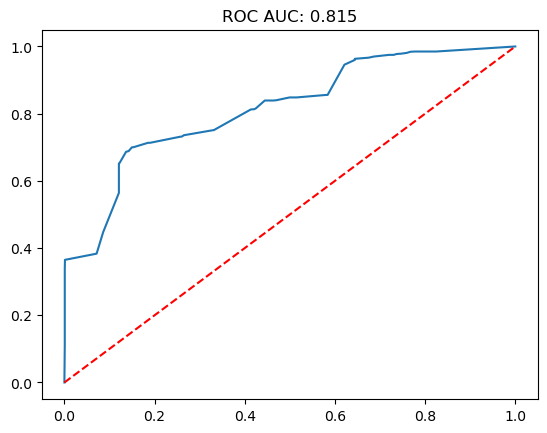

Do you want to save the model in score card? Y/N : y


In [60]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [61]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595


### Random Forest

classification report
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      2383
           1       0.79      0.66      0.72      1200

    accuracy                           0.83      3583
   macro avg       0.81      0.78      0.79      3583
weighted avg       0.82      0.83      0.82      3583



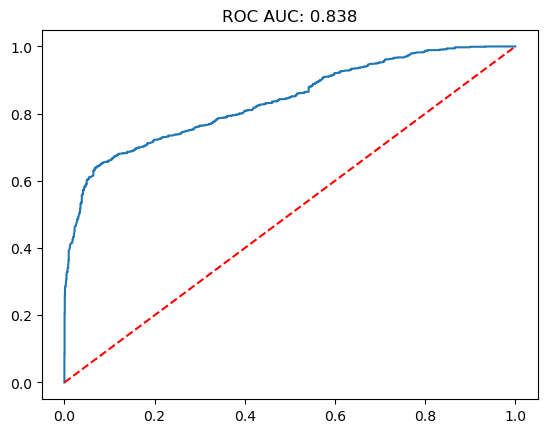

Do you want to save the model in score card? Y/N : y


In [62]:
model_validation(RandomForestClassifier(max_depth=8,n_estimators = 10),x_train,y_train,x_test,y_test)

In [63]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895


### Ada Boost

classification report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      2383
           1       0.62      0.79      0.69      1200

    accuracy                           0.77      3583
   macro avg       0.75      0.77      0.75      3583
weighted avg       0.79      0.77      0.77      3583



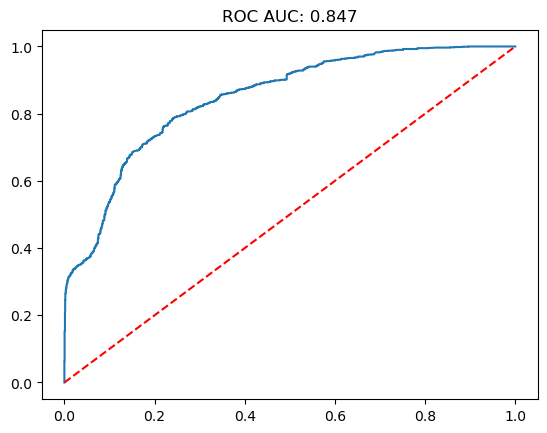

Do you want to save the model in score card? Y/N : y


In [64]:
model_validation(AdaBoostClassifier(n_estimators=120,learning_rate=0.5),x_train,y_train,x_test,y_test)

In [65]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616


### Gradient Boost

classification report
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      2383
           1       0.65      0.76      0.70      1200

    accuracy                           0.78      3583
   macro avg       0.76      0.77      0.76      3583
weighted avg       0.79      0.78      0.78      3583



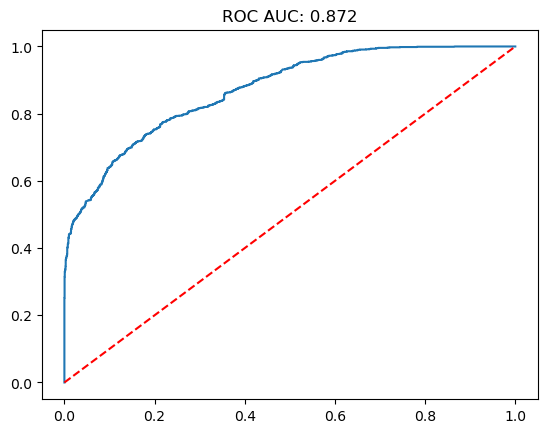

Do you want to save the model in score card? Y/N : y


In [66]:
model_validation(GradientBoostingClassifier(max_depth=6,n_estimators=150),x_train,y_train,x_test,y_test)

In [67]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.779514,0.645184,0.759167,0.697550,0.525867


### XGBoost

classification report
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      2383
           1       0.61      0.80      0.69      1200

    accuracy                           0.76      3583
   macro avg       0.74      0.77      0.75      3583
weighted avg       0.79      0.76      0.77      3583



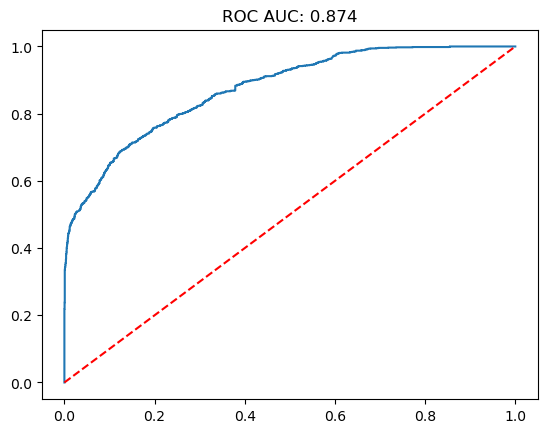

Do you want to save the model in score card? Y/N : y


In [68]:
model_validation(XGBClassifier(n_estimators=120,max_depth=4),x_train,y_train,x_test,y_test)

In [69]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.779514,0.645184,0.759167,0.697550,0.525867
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222


### Voting

In [70]:
base_learners = [('DT_4',DecisionTreeClassifier(max_depth=4)),
                 ('DT_6',DecisionTreeClassifier(max_depth=6)),
                 ('RF',RandomForestClassifier(n_estimators=120,max_depth=5)),
                 ('XGB',XGBClassifier(max_depth=4,n_estimators=100))]

classification report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      2383
           1       0.76      0.68      0.72      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.79      0.79      3583
weighted avg       0.82      0.82      0.82      3583



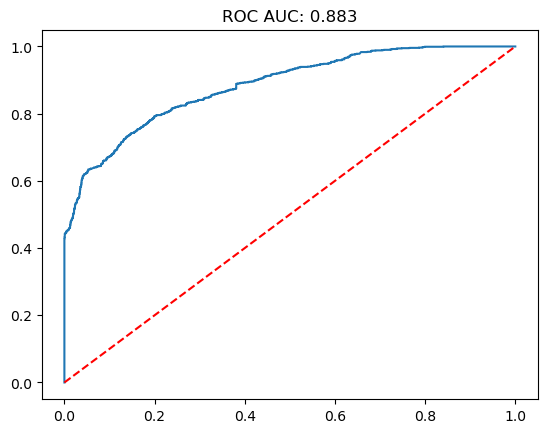

Do you want to save the model in score card? Y/N : y


In [71]:
model_validation(VotingClassifier(estimators=base_learners,voting='soft'),x_train,y_train,x_test,y_test)

In [72]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.779514,0.645184,0.759167,0.697550,0.525867
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.821937,0.762617,0.680000,0.718943,0.589257


### Stacking

classification report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      2383
           1       0.84      0.54      0.66      1200

    accuracy                           0.81      3583
   macro avg       0.82      0.75      0.76      3583
weighted avg       0.82      0.81      0.80      3583



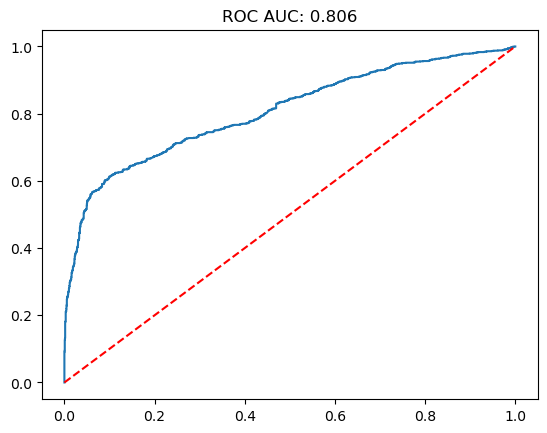

Do you want to save the model in score card? Y/N : y


In [73]:
model_validation(StackingClassifier(estimators=base_learners),
                x_train,y_train,x_test,y_test)

#### Final Scorecard

In [74]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.779514,0.645184,0.759167,0.697550,0.525867
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.821937,0.762617,0.680000,0.718943,0.589257
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.811610,0.836108,0.544167,0.659263,0.536994


Lets Go with GBM and tune it for final prediction

In [75]:
param = {'n_estimators' : [70,100,120,150],
         'learning_rate' : [1,0.5,0.1],
         'max_depth' : [3,4,5,6,7,8]}

In [76]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=param,scoring='f1',verbose=1)

In [77]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [70, 100, 120, 150]},
             scoring='f1', verbose=1)

In [78]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70}

classification report
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      2383
           1       0.73      0.75      0.74      1200

    accuracy                           0.82      3583
   macro avg       0.80      0.80      0.80      3583
weighted avg       0.82      0.82      0.82      3583



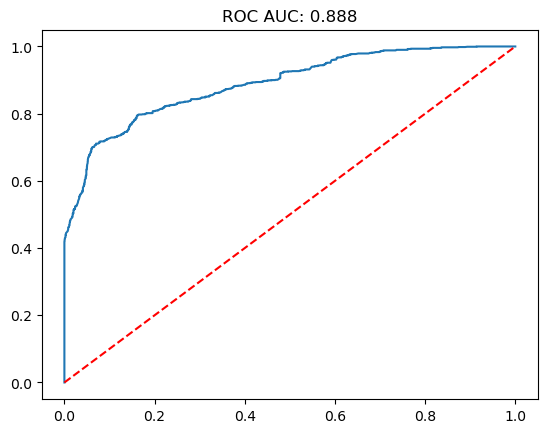

Do you want to save the model in score card? Y/N : y


In [79]:
model_validation(XGBClassifier(**gscv.best_params_),x_train,y_train,x_test,y_test)

In [80]:
scorecard

,Model,Accuracy,Precision,Recall,F1 Score,Cohen Kappa
0,LogisticRegression(),0.780352,0.746126,0.521667,0.614026,0.467168
1,DecisionTreeClassifier(max_depth=7),0.801284,0.709622,0.688333,0.698816,0.550595
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.825286,0.787000,0.655833,0.715455,0.590895
3,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.768071,0.621461,0.786667,0.694373,0.511616
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.779514,0.645184,0.759167,0.697550,0.525867
5,"XGBClassifier(base_score=None, booster=None, c...",0.759140,0.606309,0.800833,0.690126,0.499222
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.821937,0.762617,0.680000,0.718943,0.589257
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.811610,0.836108,0.544167,0.659263,0.536994
8,"XGBClassifier(base_score=None, booster=None, c...",0.823053,0.730832,0.746667,0.738664,0.604932


### Final Model

In [81]:
final_model= XGBClassifier(**gscv.best_params_)

In [82]:
final_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=70, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [83]:
# Prediction

In [84]:
x_test.head(2)

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights,arrival_day,arrival_month,arrival_weekday
0,4,1,1,103.0,1,0,1,1,1,7,4
1,147,1,2,103.7,2,2,0,2,1,7,4


In [85]:
final_model.predict_proba([[10,1,0,170,2,2,1,1,12,4,4]])[:,1][0]

0.14452223

In [86]:
import pickle

In [87]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)

In [88]:
import gradio as gr    # pip install gradio

In [89]:
with open('final_model.pkl','rb') as file:
    model = pickle.load(file)

In [90]:
def prediction(lt,mark,spcl,price,noa,wends,parking,wnights,a_day,a_month,a_wday):
    
    input = [[lt,mark,spcl,price,noa,wends,parking,wnights,a_day,a_month,a_wday]]
    prediction = model.predict_proba(input)[:,1][0]
    
    return round(prediction,3)

In [91]:
prediction(20,1,1,120,1,2,0,1,1,1,4)

0.157

### Interface

In [92]:
iface = gr.Interface(fn=prediction,
                     inputs=[gr.Number(label='How many days prior booking was made?'),
                             gr.Dropdown([('Online',1),('Offline',0)],label = 'Booking was Online/Offline?'),
                             gr.Dropdown([0,1,2,3,4,5],label = 'How many Special Requests?'),
                             gr.Number(label='What is the Room Price?'),
                             gr.Dropdown([1,2,3,4,5],label='Count of Adults?'),
                             gr.Number(label='How many weekends in the stay?'),
                             gr.Dropdown([('yes',1),('No',0)],label='Does customer require parking?'),
                             gr.Number(label='How many weeknights in the stay?'),
                             gr.Slider(minimum=1,maximum=31,step=1,label='Day of arrival?'),
                             gr.Slider(minimum=1,maximum=12,step=1,label='Month of arrival?'),
                             gr.Dropdown([('Mon',0),('Tue',1),('Wed',2),('Thus',3),('Fri',4),('Sat',5),('Sun',6)],
                                         label = 'Weekday of arrival')],
                     
                     outputs = gr.Textbox(label = 'Chances of getting this booking canceled'),
                     title = 'INN Hotel Bookings',
                     description = 'This app will predict the chances of cancellation',
                     allow_flagging = 'never')

In [93]:
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
